In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")


/Users/moiz/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('/Users/moiz/Desktop/IntrotoAI/cleaned_data.csv')
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,None of them,No,...,1.702691,83.07447,28.529842,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,No,6.0,None of them,No,...,1.600000,68.04000,26.570000,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,None of them,No,...,1.570000,63.50000,25.610000,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.650000,63.50000,23.300000,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.570000,53.98000,21.770000,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


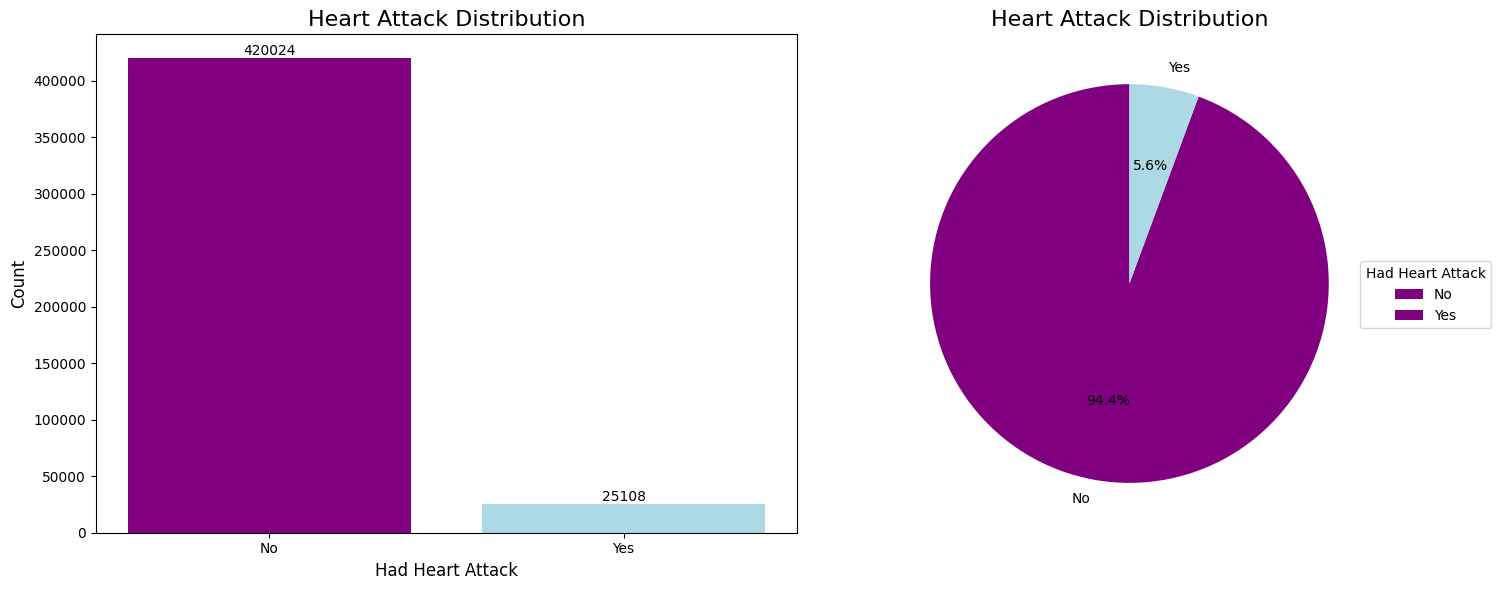


Heart Attack Distribution:
HadHeartAttack
No     420024
Yes     25108
Name: count, dtype: int64


In [3]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot
heart_attack_counts = df['HadHeartAttack'].value_counts()
colors = ['purple', 'lightblue']  # Light red for Yes, light blue for No
ax1.bar(heart_attack_counts.index, heart_attack_counts.values, color=colors)
ax1.set_title('Heart Attack Distribution', fontsize=16)
ax1.set_xlabel('Had Heart Attack', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)

# Add count labels on top of bars
for i, v in enumerate(heart_attack_counts.values):
    ax1.text(i, v, str(v), ha='center', va='bottom')

# Pie chart
ax2.pie(heart_attack_counts.values, labels=heart_attack_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax2.set_title('Heart Attack Distribution', fontsize=16)

# Add a legend
fig.legend(heart_attack_counts.index, title="Had Heart Attack", loc="center right")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print the data
print("\nHeart Attack Distribution:")
print(heart_attack_counts)

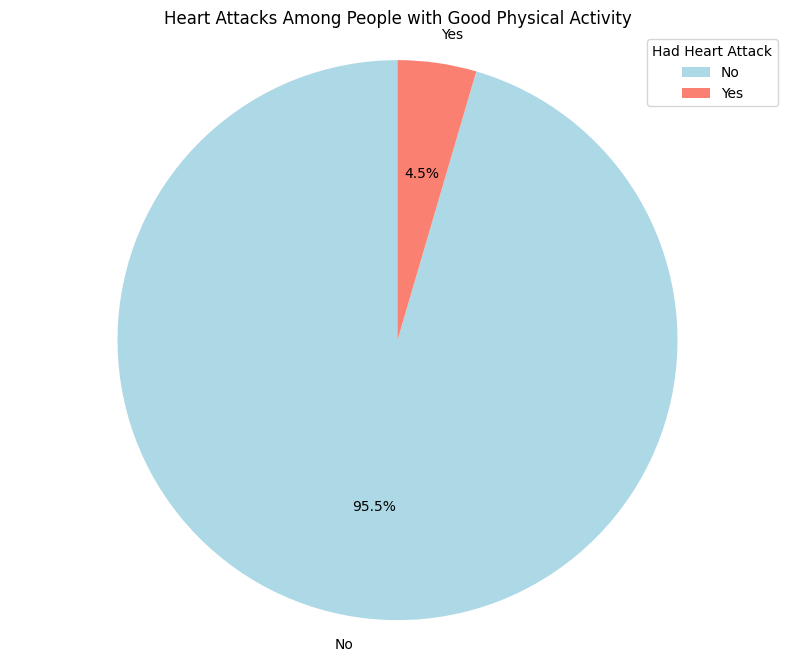

HadHeartAttack
No     323276
Yes     15376
Name: count, dtype: int64


In [4]:
good_physical_activity = df[df['PhysicalActivities'] == 'Yes']

# Count heart attacks among those with good physical activity
heart_attack_counts = good_physical_activity['HadHeartAttack'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(heart_attack_counts.values, labels=heart_attack_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
plt.title('Heart Attacks Among People with Good Physical Activity')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a legend
plt.legend(title="Had Heart Attack", loc="best")

plt.show()

# Print the counts
print(heart_attack_counts)

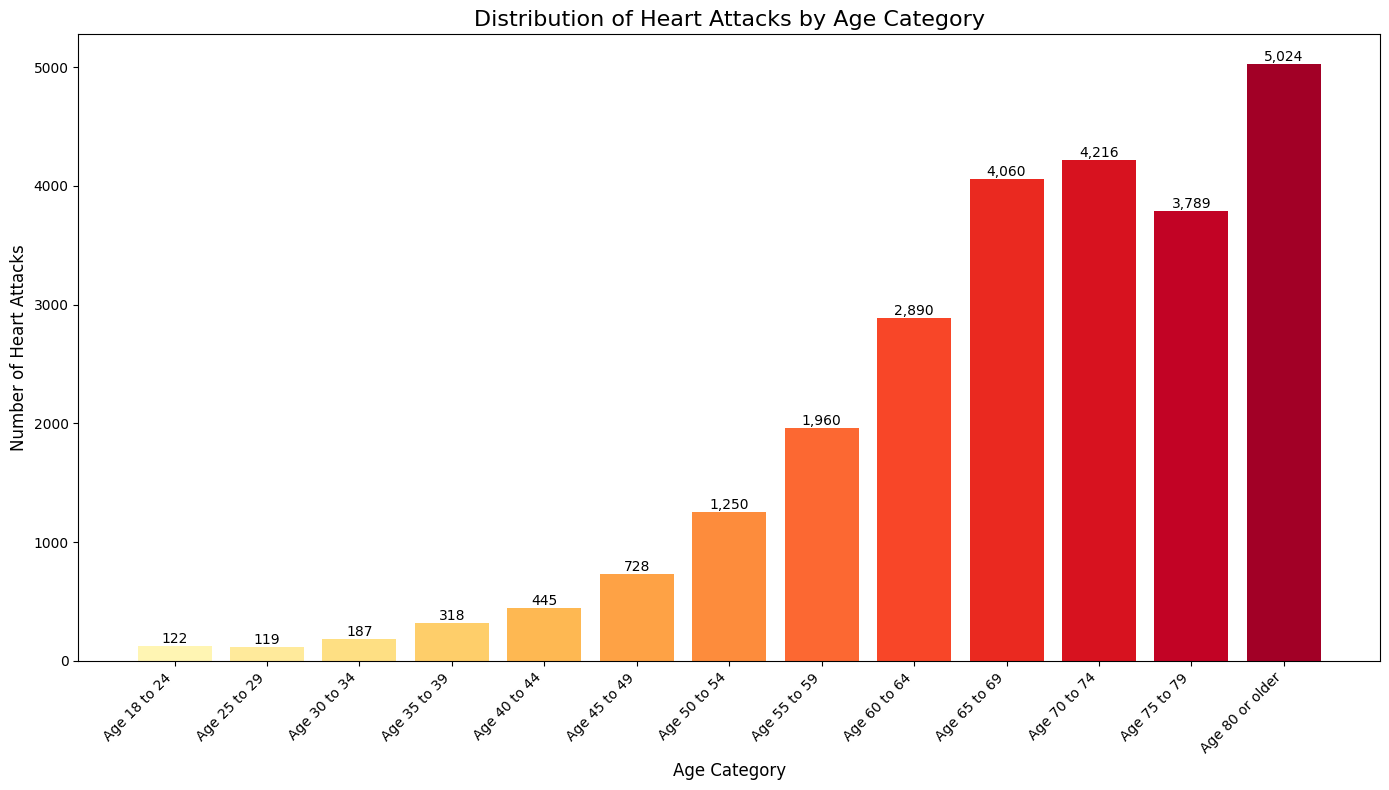

AgeCategory
Age 18 to 24        122
Age 25 to 29        119
Age 30 to 34        187
Age 35 to 39        318
Age 40 to 44        445
Age 45 to 49        728
Age 50 to 54       1250
Age 55 to 59       1960
Age 60 to 64       2890
Age 65 to 69       4060
Age 70 to 74       4216
Age 75 to 79       3789
Age 80 or older    5024
Name: count, dtype: int64


In [5]:
heart_attacks = df[df['HadHeartAttack'] == 'Yes']

# Count heart attacks by age category
heart_attacks_by_age = heart_attacks['AgeCategory'].value_counts().sort_index()

# Create a color palette
colors = sns.color_palette("YlOrRd", n_colors=len(heart_attacks_by_age))

# Create the bar graph
plt.figure(figsize=(14, 8))
bars = plt.bar(heart_attacks_by_age.index, heart_attacks_by_age.values, color=colors)

# Add labels and title
plt.title('Distribution of Heart Attacks by Age Category', fontsize=16)
plt.xlabel('Age Category', fontsize=12)
plt.ylabel('Number of Heart Attacks', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,}',
             ha='center', va='bottom')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print the data
print(heart_attacks_by_age)

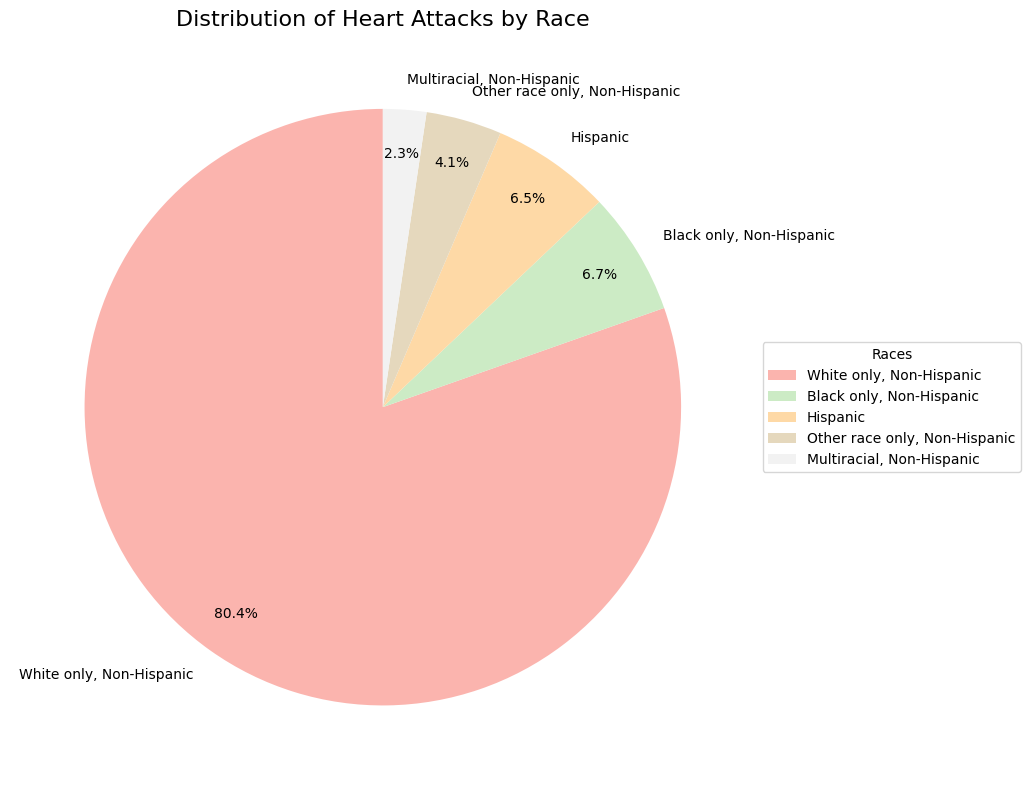

RaceEthnicityCategory
White only, Non-Hispanic         20186
Black only, Non-Hispanic          1678
Hispanic                          1625
Other race only, Non-Hispanic     1030
Multiracial, Non-Hispanic          589
Name: count, dtype: int64


In [6]:
# Filter for people who had heart attacks
heart_attacks = df[df['HadHeartAttack'] == 'Yes']

# Count heart attacks by race
heart_attacks_by_race = heart_attacks['RaceEthnicityCategory'].value_counts()

# Create a color palette
colors = plt.cm.Pastel1(np.linspace(0, 1, len(heart_attacks_by_race)))

# Create the pie chart
plt.figure(figsize=(12, 8))
plt.pie(heart_attacks_by_race.values, labels=heart_attacks_by_race.index, colors=colors, 
        autopct='%1.1f%%', startangle=90, pctdistance=0.85)

# Add a title
plt.title('Distribution of Heart Attacks by Race', fontsize=16)

# Add a legend
plt.legend(title="Races", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

# Print the data
print(heart_attacks_by_race)

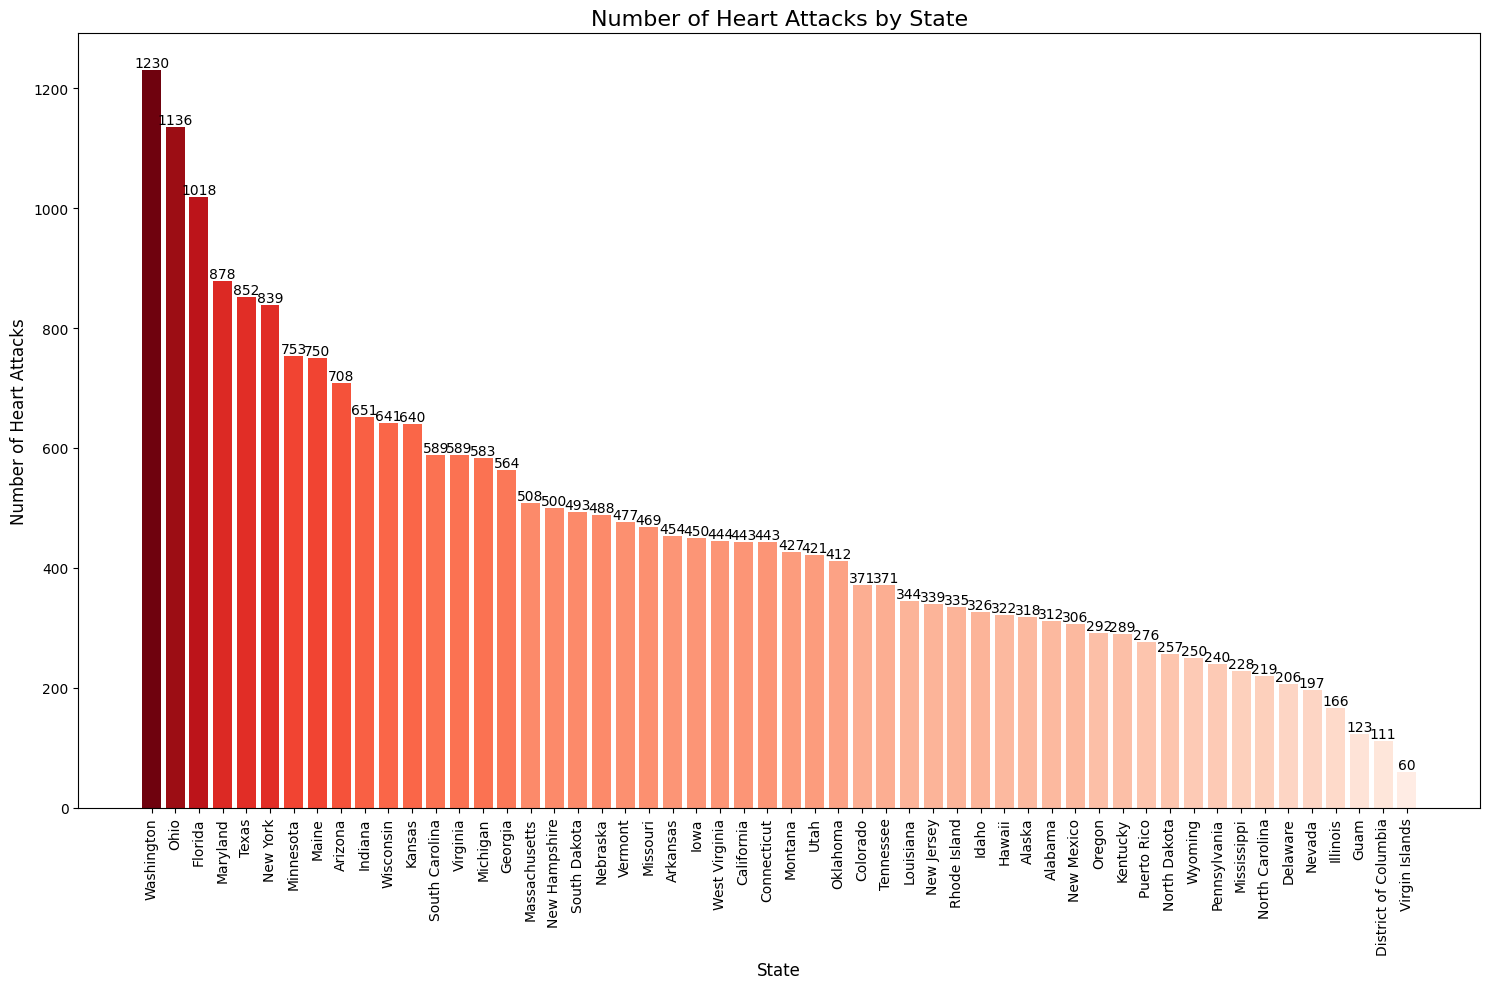

In [7]:
# Filter for people who had heart attacks
heart_attacks = df[df['HadHeartAttack'] == 'Yes']

# Count heart attacks by state
heart_attacks_by_state = heart_attacks['State'].value_counts()

# Sort the data in descending order
heart_attacks_by_state = heart_attacks_by_state.sort_values(ascending=False)

# Create a color palette
max_value = heart_attacks_by_state.max()
color_palette = sns.color_palette("Reds", n_colors=len(heart_attacks_by_state))
colors = [color_palette[int((value / max_value) * (len(color_palette) - 1))] for value in heart_attacks_by_state.values]

# Create the bar graph
plt.figure(figsize=(15, 10))
bars = plt.bar(heart_attacks_by_state.index, heart_attacks_by_state.values, color=colors)

# Customize the graph
plt.title('Number of Heart Attacks by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Heart Attacks', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()



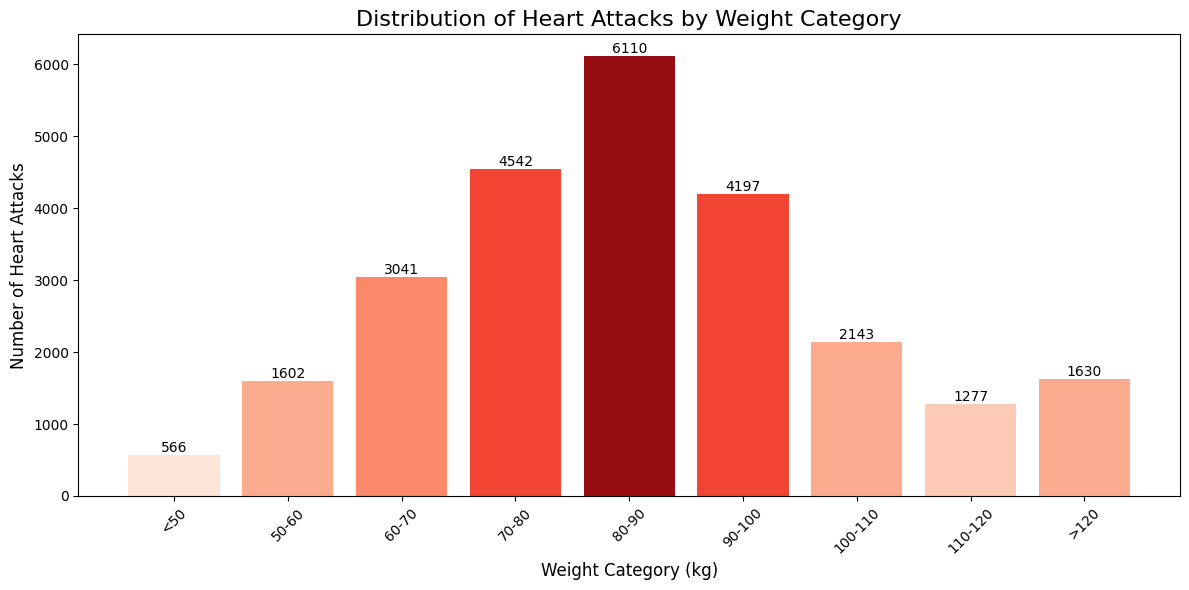

WeightCategory
<50         566
50-60      1602
60-70      3041
70-80      4542
80-90      6110
90-100     4197
100-110    2143
110-120    1277
>120       1630
Name: count, dtype: int64


In [8]:
# Filter for people who had heart attacks
heart_attacks = df[df['HadHeartAttack'] == 'Yes']

# Create weight categories
heart_attacks['WeightCategory'] = pd.cut(heart_attacks['WeightInKilograms'], 
                                         bins=[0, 50, 60, 70, 80, 90, 100, 110, 120, float('inf')],
                                         labels=['<50', '50-60', '60-70', '70-80', '80-90', '90-100', '100-110', '110-120', '>120'])

# Count heart attacks by weight category
heart_attacks_by_weight = heart_attacks['WeightCategory'].value_counts().sort_index()

# Create a color palette
max_value = heart_attacks_by_weight.max()
color_palette = sns.color_palette("Reds", n_colors=len(heart_attacks_by_weight))
colors = [color_palette[int((value / max_value) * (len(color_palette) - 1))] for value in heart_attacks_by_weight.values]

# Create the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(heart_attacks_by_weight.index, heart_attacks_by_weight.values, color=colors)

# Customize the chart
plt.title('Distribution of Heart Attacks by Weight Category', fontsize=16)
plt.xlabel('Weight Category (kg)', fontsize=12)
plt.ylabel('Number of Heart Attacks', fontsize=12)
plt.xticks(rotation=45)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print the data
print(heart_attacks_by_weight)

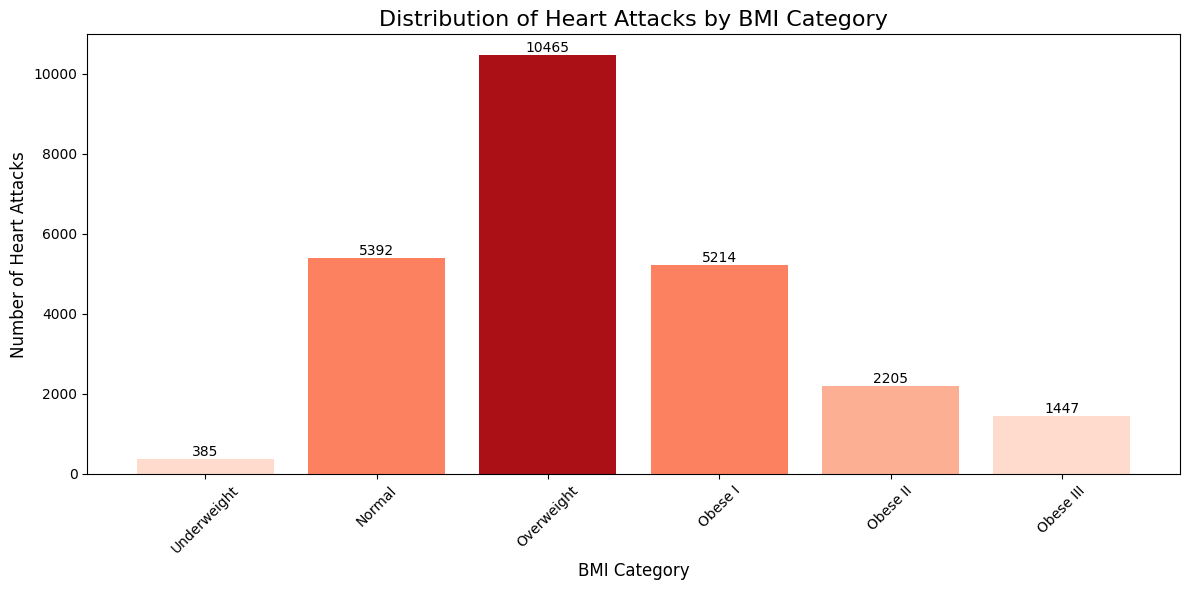

BMICategory
Underweight      385
Normal          5392
Overweight     10465
Obese I         5214
Obese II        2205
Obese III       1447
Name: count, dtype: int64


In [9]:
# Filter for people who had heart attacks
heart_attacks = df[df['HadHeartAttack'] == 'Yes']

# Create BMI categories
bmi_bins = [0, 18.5, 25, 30, 35, 40, float('inf')]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III']
heart_attacks['BMICategory'] = pd.cut(heart_attacks['BMI'], bins=bmi_bins, labels=bmi_labels)

# Count heart attacks by BMI category
heart_attacks_by_bmi = heart_attacks['BMICategory'].value_counts().sort_index()

# Create a color palette
max_value = heart_attacks_by_bmi.max()
color_palette = sns.color_palette("Reds", n_colors=len(heart_attacks_by_bmi))
colors = [color_palette[int((value / max_value) * (len(color_palette) - 1))] for value in heart_attacks_by_bmi.values]

# Create the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(heart_attacks_by_bmi.index, heart_attacks_by_bmi.values, color=colors)

# Customize the chart
plt.title('Distribution of Heart Attacks by BMI Category', fontsize=16)
plt.xlabel('BMI Category', fontsize=12)
plt.ylabel('Number of Heart Attacks', fontsize=12)
plt.xticks(rotation=45)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print the data
print(heart_attacks_by_bmi)

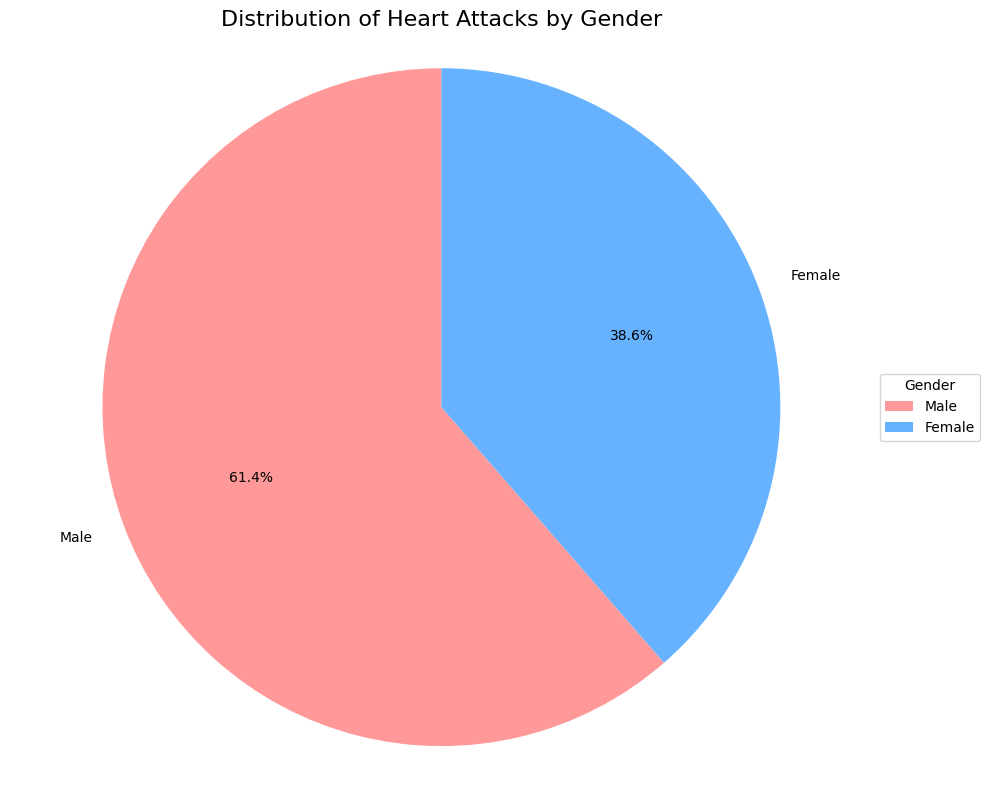

Sex
Male      15417
Female     9691
Name: count, dtype: int64


In [10]:
# Filter for people who had heart attacks
heart_attacks = df[df['HadHeartAttack'] == 'Yes']

# Count heart attacks by gender
heart_attacks_by_gender = heart_attacks['Sex'].value_counts()

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(heart_attacks_by_gender.values, labels=heart_attacks_by_gender.index, 
        autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#66B2FF'])

# Add a title
plt.title('Distribution of Heart Attacks by Gender', fontsize=16)

# Add a legend
plt.legend(title="Gender", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

# Print the data
print(heart_attacks_by_gender)

In [12]:
# Print unique values in the State column
print("Unique values in the State column:")
print(df['State'].unique())

# Count heart attacks by state
heart_attacks_by_state = df[df['HadHeartAttack'] == 'Yes']['State'].value_counts().reset_index()
heart_attacks_by_state.columns = ['State', 'HeartAttacks']

# Calculate heart attack rate per 100,000 people
state_populations = df['State'].value_counts().reset_index()
state_populations.columns = ['State', 'Population']
heart_attacks_by_state = heart_attacks_by_state.merge(state_populations, on='State')
heart_attacks_by_state['HeartAttackRate'] = (heart_attacks_by_state['HeartAttacks'] / heart_attacks_by_state['Population']) * 100000

# Print the first few rows of the processed data
print("\nFirst few rows of processed data:")
print(heart_attacks_by_state.head())

# Create a dictionary to map state names to their two-letter codes
state_code_map = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Convert state names to codes if necessary
if heart_attacks_by_state['State'].iloc[0] not in state_code_map.values():
    heart_attacks_by_state['State'] = heart_attacks_by_state['State'].map(state_code_map)

# Create the choropleth map
fig = px.choropleth(heart_attacks_by_state,
                    locations='State', 
                    locationmode="USA-states", 
                    color='HeartAttackRate',
                    scope="usa",
                    color_continuous_scale="Reds",
                    labels={'HeartAttackRate':'Heart Attack Rate per 100,000'},
                    title='Heart Attack Rates by State')

# Update the layout
fig.update_layout(
    title_x=0.5,
    geo_scope='usa',
)

# Show the map
fig.show()

Unique values in the State column:
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']

First few rows of processed data:
        State  HeartAttacks  Population  HeartAttackRate
0  Washington          1230       26152      4703.273172
1        Ohio          1136       16487      6890.277188
2     Florida          1018       13393      7600.985589
3    Maryland           878       16418      5347.789012
4

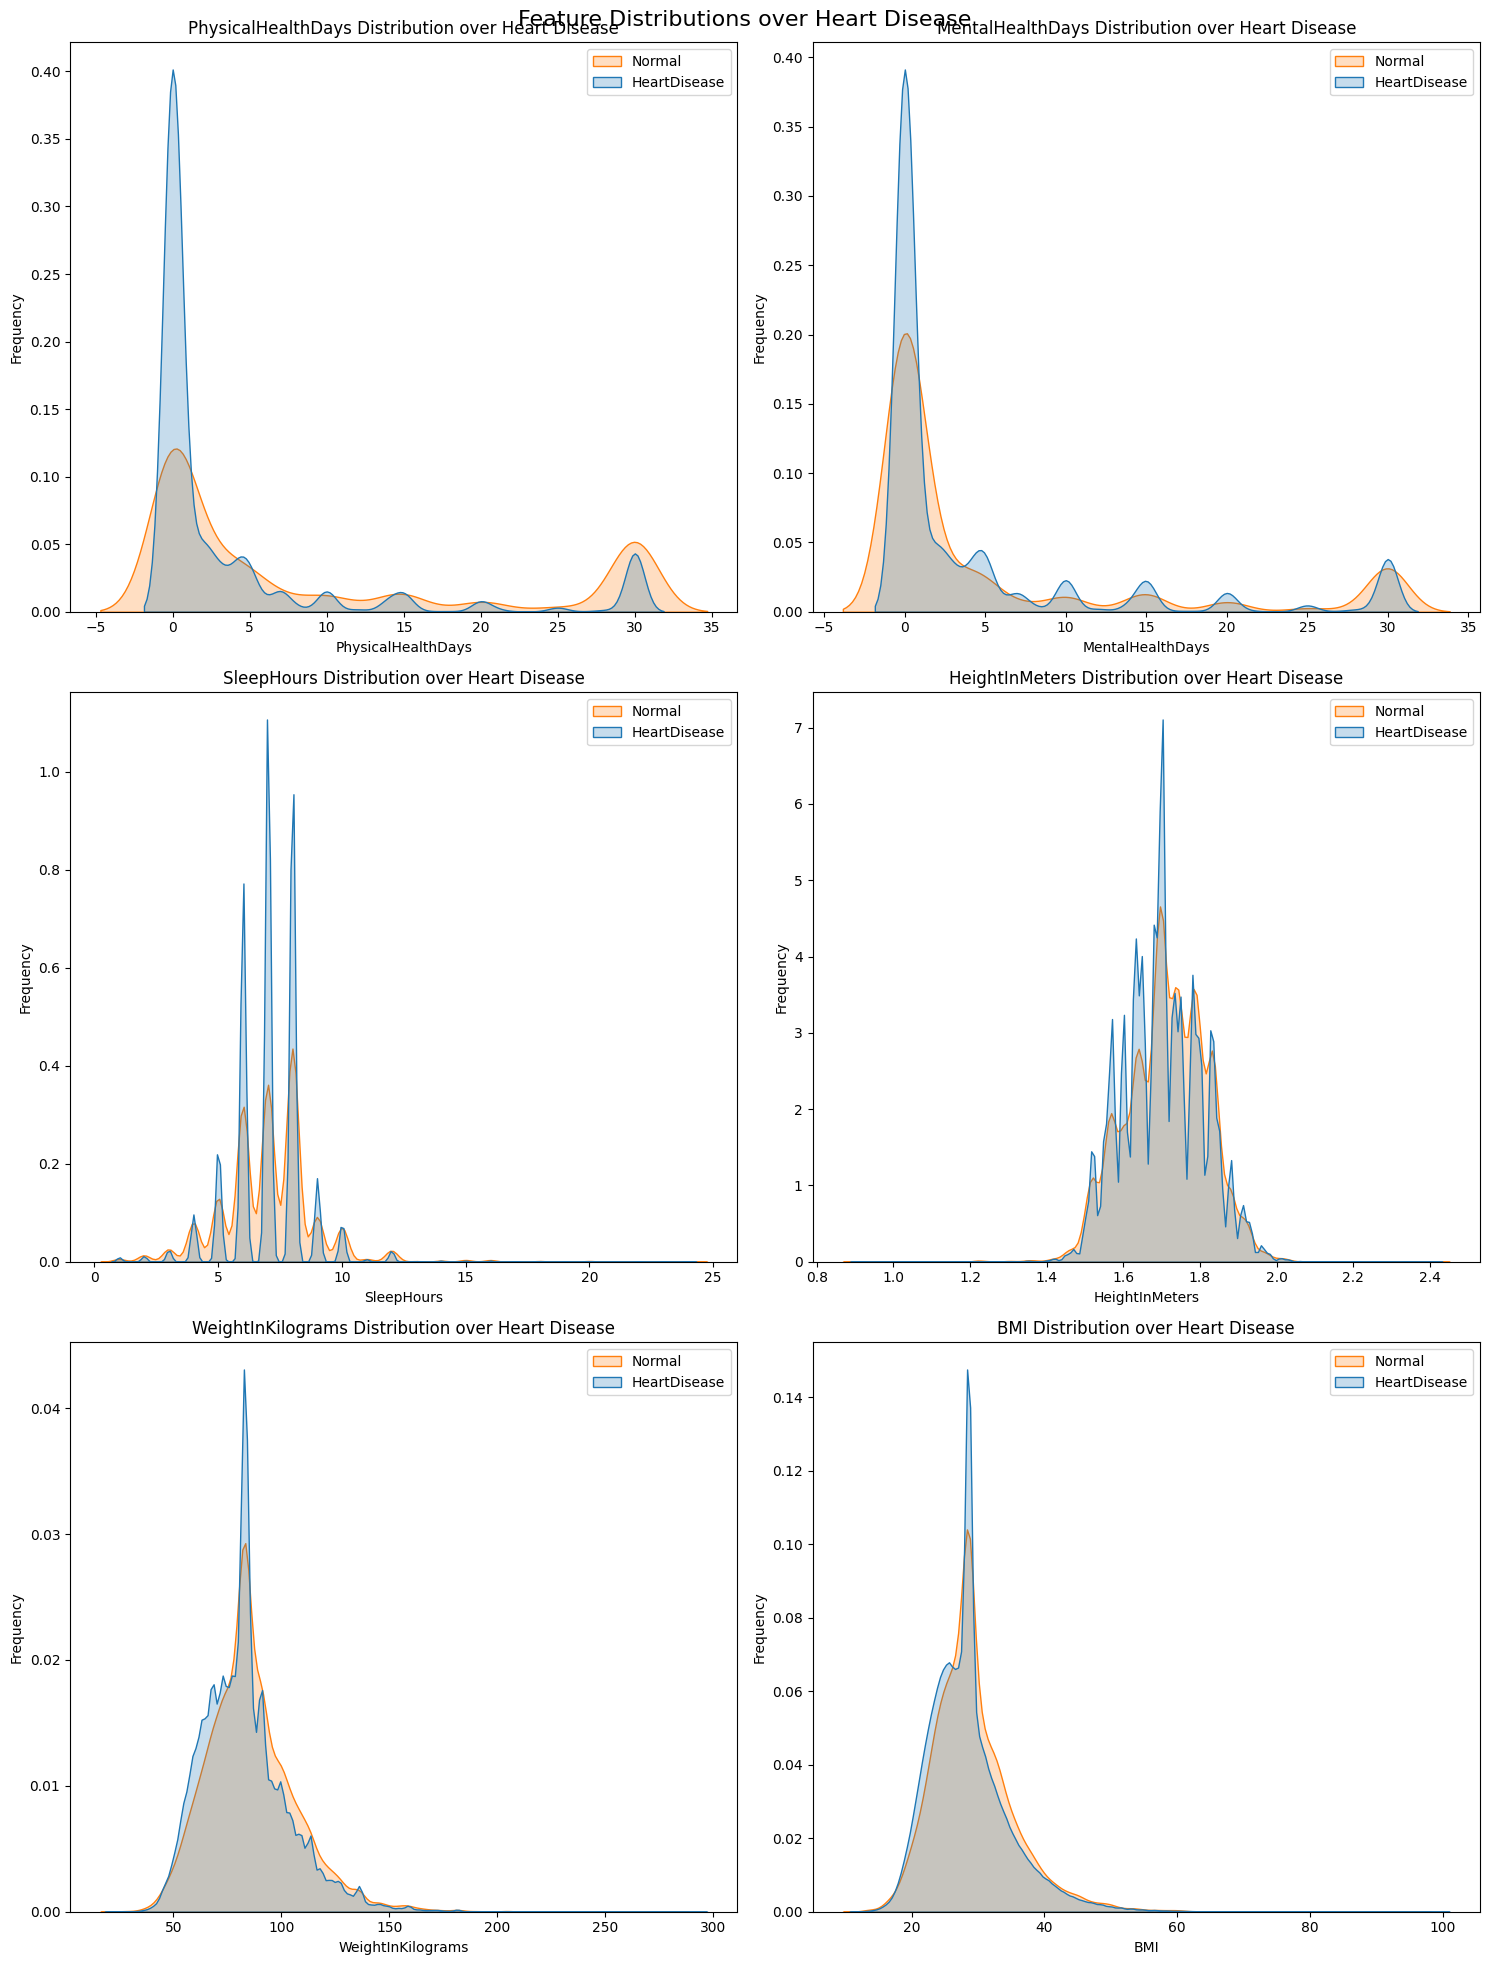

In [13]:
# List of numeric features to plot
features = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 
            'HeightInMeters', 'WeightInKilograms', 'BMI']

# Set up the plot
fig, axes = plt.subplots(3, 2, figsize=(15, 20))
fig.suptitle('Feature Distributions over Heart Disease', fontsize=16)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create distribution plots for each feature
for i, feature in enumerate(features):
    sns.kdeplot(data=df, x=feature, hue='HadHeartAttack', 
                ax=axes[i], fill=True, common_norm=False)
    axes[i].set_title(f'{feature} Distribution over Heart Disease')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend(labels=['Normal', 'HeartDisease'])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

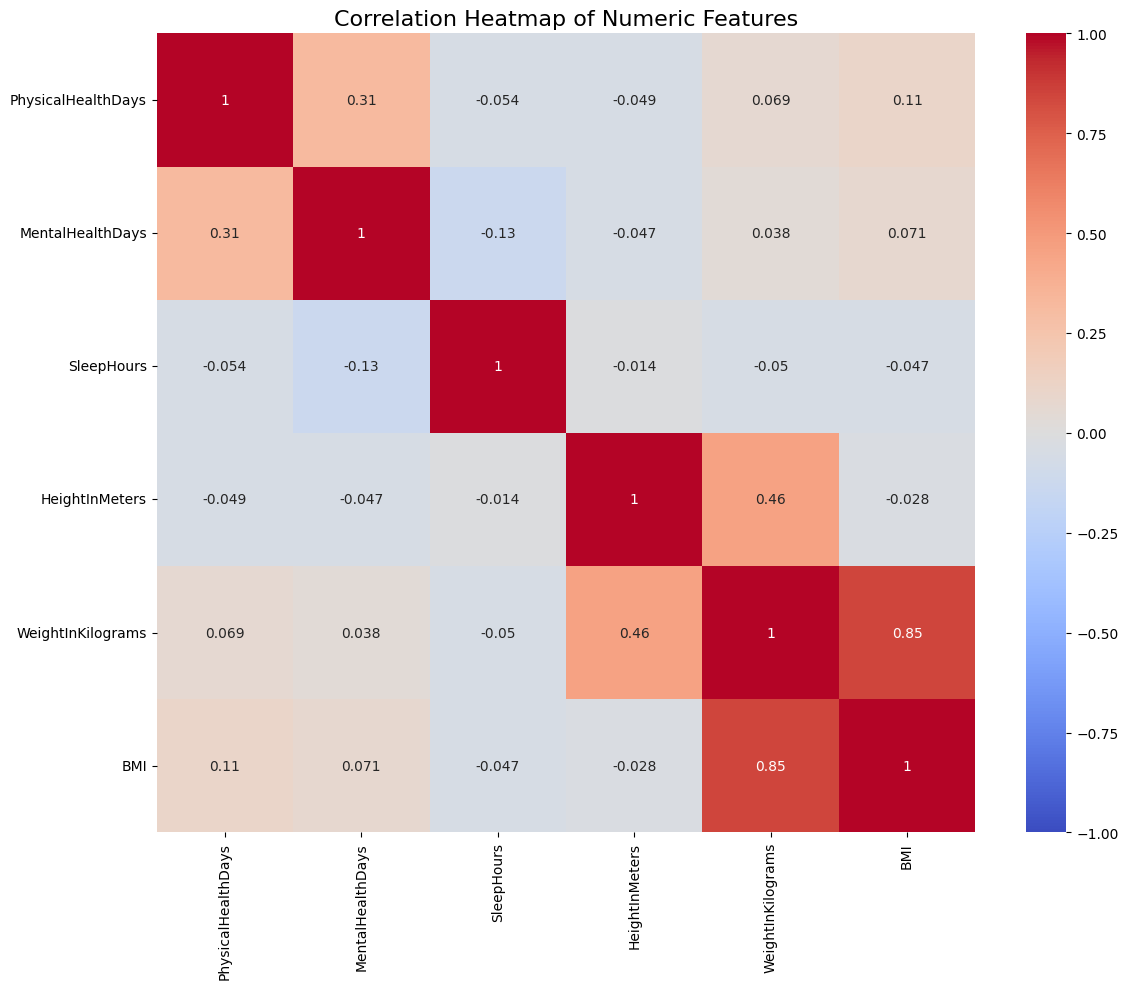

In [14]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

# Set the title
plt.title('Correlation Heatmap of Numeric Features', fontsize=16)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()